# XgBoost Tianqi Chen 2014
* XFBoost, GBM'in hız ve tahmin performansını arttırmak üzere optimize edilmiş, ölçeklenebilir ve farklı platformlara entegre edilebilir halidir.
* R, Python, Headoop, Scala, Julia ile kullanılabilir.
* Ölçeklenebilirdir.
* Hızlıdır.
* Tahmin başarısı yüksektir.
* Bir çok kaggle yarışmasında başarısını kanıtlamıştır.
---

libraray

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler ## standartlaStırma
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
df = pd.read_csv('Hitters.csv')
df = df.dropna()
y= df['Salary']
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']]) ## one hot encoding
X_= df.drop(['Salary', 'League', 'Division','NewLeague'], axis =1).astype('float64')
X= pd.concat([X_,dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

### model ve tahmin

In [3]:
!pip install xgboost

In [7]:
import xgboost
from xgboost import XGBRegressor

In [8]:
xgb = XGBRegressor().fit(X_train,y_train)

In [9]:
?xgb

Type:        XGBRegressor
String form:
XGBRegressor(base_score=None, booster=None, callbacks=None,
           colsample_bylevel=None,  <...> one, n_estimators=None, n_jobs=None,
           num_parallel_tree=None, random_state=None, ...)
File:        c:\users\ycanf\anaconda3\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost regression.
See :doc:`/python/sklearn_estimator` for more information.

Parameters
----------

    n_estimators : Optional[int]
        Number of gradient boosted trees.  Equivalent to number of boosting
        rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    max_leaves :
        Maximum number of leaves; 0 indicates no limit.
    max_bin :
        If using histogram-based algorithm, maximum number of bins per feature
    grow_policy :
        Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
        depth-wise. 1: favor splitting at nodes with h

In [10]:
y_pred = xgb.predict(X_test)

In [11]:
np.sqrt(mean_squared_error(y_test,y_pred))

366.3863437634965

### Tuning
* learning_rate : daraltma adım boyunu ifade eder, overfittingi engellemeye yöneliktir.
* 

In [16]:
?xgb

Type:        XGBRegressor
String form:
XGBRegressor(base_score=None, booster=None, callbacks=None,
           colsample_bylevel=None,  <...> one, n_estimators=None, n_jobs=None,
           num_parallel_tree=None, random_state=None, ...)
File:        c:\users\ycanf\anaconda3\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost regression.
See :doc:`/python/sklearn_estimator` for more information.

Parameters
----------

    n_estimators : Optional[int]
        Number of gradient boosted trees.  Equivalent to number of boosting
        rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    max_leaves :
        Maximum number of leaves; 0 indicates no limit.
    max_bin :
        If using histogram-based algorithm, maximum number of bins per feature
    grow_policy :
        Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
        depth-wise. 1: favor splitting at nodes with h

In [14]:
xgb = XGBRegressor()

In [15]:
xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [17]:
xgb_params= {"learning_rate" : [0.1,0.01,0.5],
            "max_depth" : [2,3,4,5,8],
            "n_estimators" : [100,200,500,1000],
            "colsample_bytree" : [0.4,0.7,1]}

In [18]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv=10,n_jobs=-1,verbose=3).fit(X_train,y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


In [20]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100}

In [21]:
xgb_tuned = XGBRegressor(colsample_bytree=0.4,learning_rate=0.1,max_depth=5,n_estimators=100).fit(X_train,y_train)

In [22]:
y_pred = xgb_tuned.predict(X_test)

In [23]:
np.sqrt(mean_squared_error(y_test,y_pred))

345.4191388100258

# değişken önem düzeyi

In [24]:
Importance = pd.DataFrame({'Importance': xgb_tuned.feature_importances_*100},
                         index= X_train.columns)

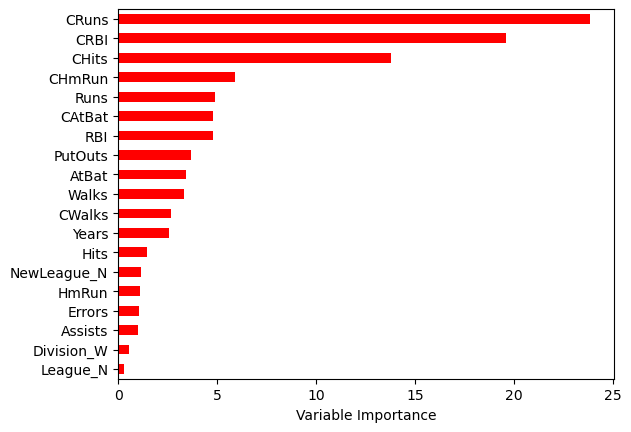

In [25]:
Importance.sort_values(by = 'Importance', axis = 0 , ascending=True).plot(kind='barh', color='r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [32]:
xgb_tuned.feature_importances_*100

array([ 3.4200442 ,  1.4479895 ,  1.129698  ,  4.8879495 ,  4.7926598 ,
        3.3220198 ,  2.5662997 ,  4.8019915 , 13.776666  ,  5.916119  ,
       23.879465  , 19.626764  ,  2.6642663 ,  3.6832218 ,  0.9911506 ,
        1.076412  ,  0.28018254,  0.5746777 ,  1.1624231 ], dtype=float32)

C:\Users\ycanf\anaconda3\Lib\site-packages\joblib\_memmapping_reducer.py:611: UserWarning: Failed to delete temporary folder: C:\Users\ycanf\AppData\Local\Temp\joblib_memmapping_folder_4808_57f818e351e5413cbed398c5ffd0af34_4c25fb0b50344462894453fc9b6e3390
  warnings.warn("Failed to delete temporary folder: {}"
C:\Users\ycanf\anaconda3\Lib\site-packages\joblib\_memmapping_reducer.py:611: UserWarning: Failed to delete temporary folder: C:\Users\ycanf\AppData\Local\Temp\joblib_memmapping_folder_4808_57f818e351e5413cbed398c5ffd0af34_6d538881b3b84e53aff500d9e5440c37
  warnings.warn("Failed to delete temporary folder: {}"
